# Laboratorio de Regresión Lineal

En este laboratorio, aplicaremos técnicas de regresión lineal utilizando Python y librerías como sklearn y statsmodels. El objetivo es ajustar un modelo de regresión que nos permita predecir una variable objetivo a partir de un conjunto de variables predictoras.

## Ejercicio de Ejemplo:

**1. Carga de Datos:**

- Utiliza un conjunto de datos para regresión diferente al de California Housing. Puedes usar el dataset "Wine Quality" disponible en UCI Machine Learning Repository.

**2. Análisis Exploratorio de Datos:**

- Realiza un análisis exploratorio de los datos que incluya estadísticas descriptivas y visualizaciones básicas.
- Identifica la variable objetivo y las variables predictoras.

**3. Revisión de la Multicolinealidad:**

- Calcula la matriz de correlación y visualízala utilizando un mapa de calor (heatmap).
- Calcula el Factor de Inflación de la Varianza (VIF) para las variables predictoras.

**4. Ajuste de un Modelo Inicial:**

- Ajusta un modelo de regresión lineal múltiple utilizando todas las variables predictoras.

**5. Revisión de las Variables No Significativas:**

- Revisa los coeficientes y los valores p de las variables en el modelo.
- Identifica las variables que no son estadísticamente significativas.

**6. Ajuste del Modelo Final:**

- Ajusta un nuevo modelo excluyendo las variables no significativas.
- Compara el desempeño del modelo final con el inicial.

**7. Realizar una Predicción:**

- Utiliza el modelo final para realizar predicciones sobre un conjunto de datos de prueba o sobre nuevos datos.

### 1. Carga de Datos

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Cargar el dataset "Wine Quality"
# Puedes descargar los datos y guardarlos en el mismo directorio de tu script
df = pd.read_csv('winequality-red.csv', sep=',')

# Mostrar las primeras filas del dataset
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Análisis Exploratorio de Datos Básico

Dimensiones del dataset: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


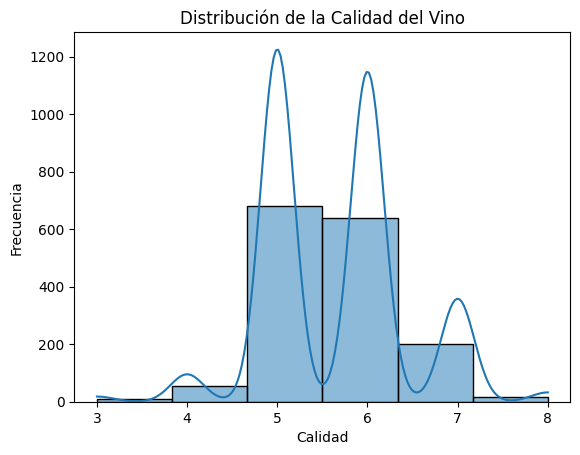

In [2]:
# Dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()

# Histograma de la variable objetivo
sns.histplot(df['quality'], bins=6, kde=True)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Matriz de dispersión (opcional si el dataset no es muy grande)
# sns.pairplot(df)


### 3. Revisión de la Multicolinealidad

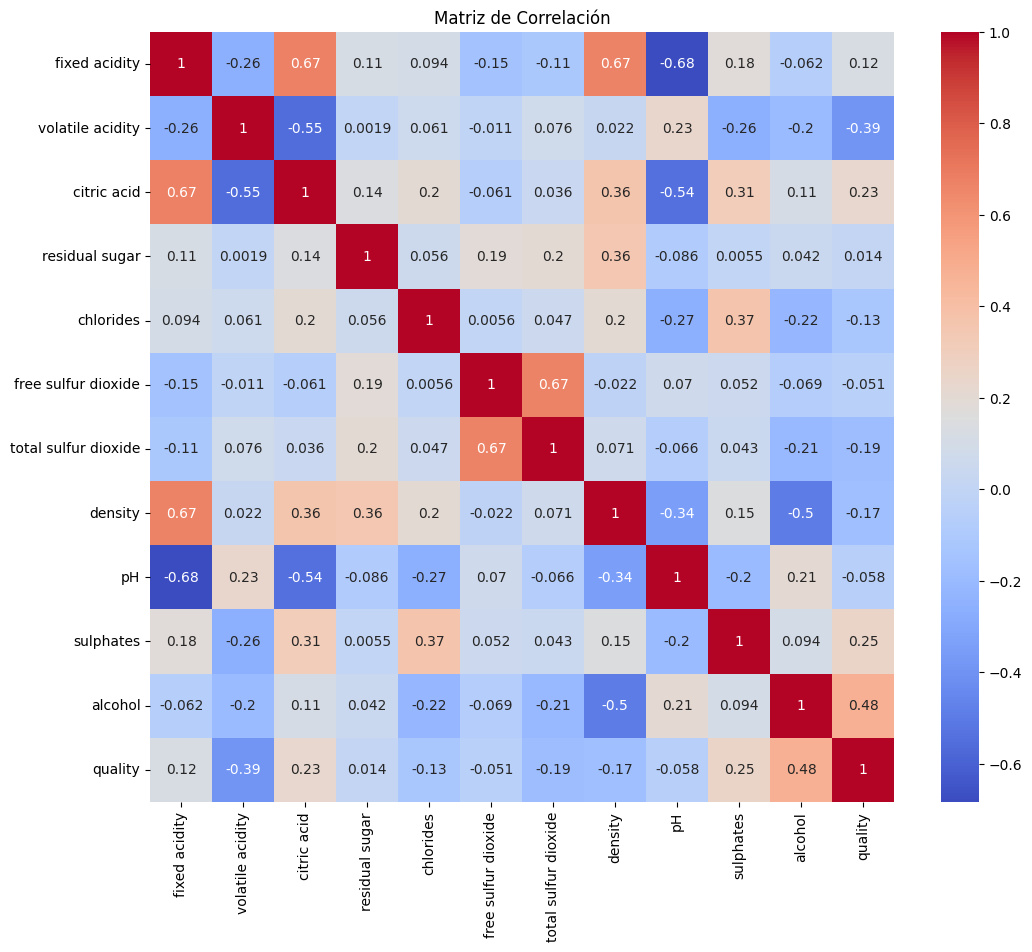

                Variable           VIF
0                  const  1.710538e+06
1          fixed acidity  7.767512e+00
2       volatile acidity  1.789390e+00
3            citric acid  3.128022e+00
4         residual sugar  1.702588e+00
5              chlorides  1.481932e+00
6    free sulfur dioxide  1.963019e+00
7   total sulfur dioxide  2.186813e+00
8                density  6.343760e+00
9                     pH  3.329732e+00
10             sulphates  1.429434e+00
11               alcohol  3.031160e+00


In [3]:
# Matriz de correlación
corr_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Cálculo del VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variables predictoras
X = df.drop('quality', axis=1)
# Añadir una constante para el intercepto
X = sm.add_constant(X)

# DataFrame para almacenar los VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

# Mostrar los VIF
print(vif_data)


### 4. Ajuste de un Modelo Inicial

In [4]:
# Variables predictoras y variable objetivo
X = df.drop('quality', axis=1)
y = df['quality']

# Añadir constante
X = sm.add_constant(X)

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.79e-145
Time:                        19:39:30   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

### 5. Revisión de las Variables No Significativas

En el resumen del modelo, observamos los valores p asociados a cada coeficiente. Variables con valores p mayores a 0.05 no son estadísticamente significativas al nivel del 95%.

### 6. Ajuste del Modelo Final

In [5]:
# Importar statsmodels
import statsmodels.api as sm

# Variables predictoras y variable objetivo
X = df.drop(['quality', 'fixed acidity', 'citric acid', 'residual sugar', 'density'], axis=1)
y = df['quality']

# Añadir constante
X = sm.add_constant(X)

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          5.32e-149
Time:                        19:39:51   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301 

**Comparación de Modelos**

Comparar el R-cuadrado ajustado y el estadístico AIC entre ambos modelos para evaluar si el modelo simplificado es mejor.

### 7. Realizar una Predicción

Error Cuadrático Medio (MSE): 0.3912782138290923
Coeficiente de Determinación (R^2): 0.4012628835442992


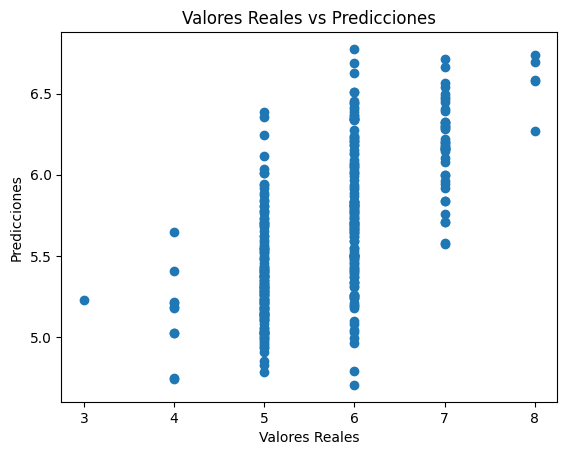

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'fixed acidity', 'citric acid', 'residual sugar', 'density'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo final con sklearn
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realizar predicciones
y_pred = regressor.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Comparar valores reales vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()


**Conclusiones:**

- A través del análisis exploratorio, pudimos entender mejor la distribución y las relaciones entre las variables.
- La revisión de la multicolinealidad nos permitió identificar variables altamente correlacionadas y reducir la redundancia en el modelo.
- Al ajustar el modelo inicial y revisar las variables no significativas, mejoramos la simplicidad y la interpretabilidad del modelo sin comprometer significativamente su desempeño.
- La evaluación del modelo final mostró un buen ajuste y capacidad predictiva, aunque siempre es importante considerar posibles mejoras y validar el modelo con diferentes métricas y técnicas.

## Ejercicio para resolver

**1. Carga de Datos:**

- Utiliza un conjunto de datos para regresión diferente al de California Housing y Wine Quality. Puedes usar el dataset "Medical Cost Personal" disponible en Kaggle o cualquier otro dataset de tu elección que sea adecuado para un problema de regresión.

- Procura identificar como primer paso cuál es la variable de salida y cuáles son las variables (features) predictoras.

**2. Análisis Exploratorio de Datos:**

- Realiza un análisis exploratorio de los datos que incluya estadísticas descriptivas y visualizaciones básicas.
- Identifica la variable objetivo y las variables predictoras.

**3. Revisión de la Multicolinealidad:**

- Calcula la matriz de correlación y visualízala utilizando un mapa de calor (heatmap).
- Calcula el Factor de Inflación de la Varianza (VIF) para las variables predictoras.

**4. Ajuste de un Modelo Inicial:**

- Ajusta un modelo de regresión lineal múltiple utilizando todas las variables predictoras.

**5. Revisión de las Variables No Significativas:**

- Revisa los coeficientes y los valores p de las variables en el modelo.
- Identifica las variables que no son estadísticamente significativas.

**6. Ajuste del Modelo Final:**

- Ajusta un nuevo modelo excluyendo las variables no significativas.
- Compara el desempeño del modelo final con el inicial.

**7. Realizar una Predicción:**

- Utiliza el modelo final para realizar predicciones sobre un conjunto de datos de prueba o sobre nuevos datos.

In [21]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Cargar el dataset "Wine Quality"
# Puedes descargar los datos y guardarlos en el mismo directorio de tu script
df = pd.read_csv('insurance.csv', sep=',')

# Mostrar las primeras filas del dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado y estadísticas
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

# Librerías para machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Cargar el dataset
# df = pd.read_csv('insurance.csv')

df = pd.read_csv('insurance.csv',
    dtype = { # indicate categorical variables
        'sex': 'category',
        'smoker': 'category',
        'region': 'category'
    }
)

# Mostrar las primeras filas
print(df.head())

# Información del dataset
print(df.info())

# Verificar valores nulos
print("Valores nulos en cada columna:")
print(df.isnull().sum())

# Identificar variables categóricas
categorical_features = ['sex', 'smoker', 'region']

# Codificación con get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=np.int64)

# Verificar que todas las variables ahora son numéricas
print(df_encoded.info())
print(df_encoded.head())




   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB
None
Valores nulos en cada columna:
age         0
sex         0
bmi         0
children

Dimensiones del dataset: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


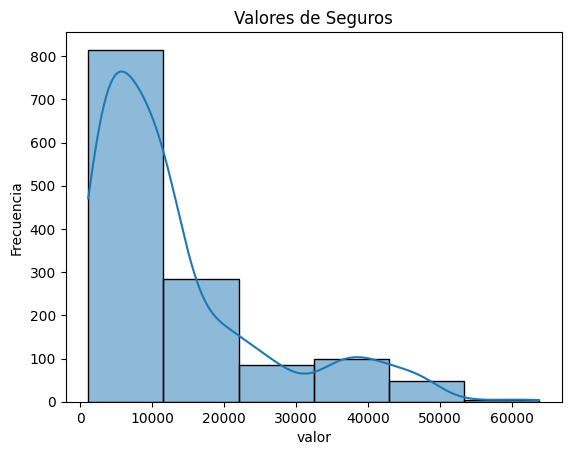

In [26]:
# Dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()

# Histograma de la variable objetivo
sns.histplot(df['charges'], bins=6, kde=True)
plt.title('Valores de Seguros')
plt.xlabel('valor')
plt.ylabel('Frecuencia')
plt.show()

# Matriz de dispersión (opcional si el dataset no es muy grande)
# sns.pairplot(df)


# Revision de multicolinealidad

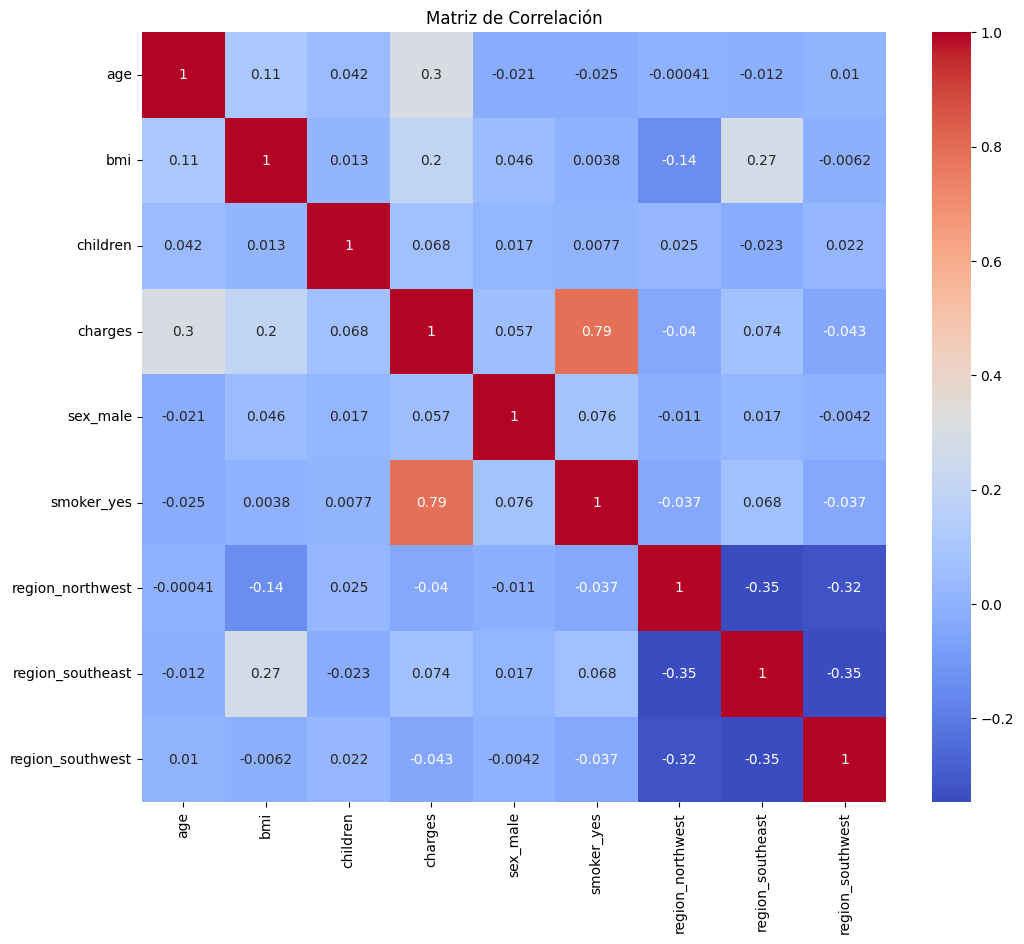

           Variable        VIF
0             const  35.527488
1               age   1.016822
2               bmi   1.106630
3          children   1.004011
4          sex_male   1.008900
5        smoker_yes   1.012074
6  region_northwest   1.518823
7  region_southeast   1.652230
8  region_southwest   1.529411


In [30]:
# Matriz de correlación
corr_matrix = df_encoded.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Cálculo del VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variables predictoras
X = df_encoded.drop('charges', axis=1)

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# DataFrame para almacenar los VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

# Mostrar los VIF
print(vif_data)


In [31]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Añadir constante
X = sm.add_constant(X)

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:05:59   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  